# Tutorial for asedias with updated class-based API


In [1]:
!pip install ase
!pip install rdkit


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [1]:
import sys
sys.path.append('/workspaces/asedias')

gxtb command not found. Installing...
Installing g-xTB files...
  >  File already exists: /home/codespace/.gxtb. Skipping.
  >  File already exists: /home/codespace/.basisq. Skipping.
  >  File already exists: /home/codespace/.eeq. Skipping.
  >  File already exists: /home/codespace/bin/gxtb. Skipping.
Added /home/codespace/bin to PATH
g-xTB installation completed!
Binary installed at: /home/codespace/bin/gxtb
Parameter files installed in: /home/codespace
~/bin has been added to PATH for this session.
Progress Summary:
Total Energies -> Optimize Fragments -> Fragment Energies

Starting step: Total Energies


100%|██████████| 101/101 [00:06<00:00, 16.09it/s]


Progress Summary:
Total Energies -> Optimize Fragments -> Fragment Energies

Starting step: Optimize Fragments


  0%|          | 0/2 [00:00<?, ?it/s]

      Step     Time          Energy          fmax
BFGS:    0 03:31:27    -8339.739289        0.348535
BFGS:    1 03:31:28    -8339.745770        0.270120
BFGS:    2 03:31:29    -8339.749355        0.328160
BFGS:    3 03:31:29    -8339.750603        0.128252
BFGS:    4 03:31:30    -8339.751018        0.082612
BFGS:    5 03:31:31    -8339.751427        0.055815
BFGS:    6 03:31:31    -8339.751721        0.061190
BFGS:    7 03:31:32    -8339.752049        0.056496
BFGS:    8 03:31:32    -8339.752283        0.043884


 50%|█████     | 1/2 [00:05<00:05,  5.58s/it]

      Step     Time          Energy          fmax
BFGS:    0 03:31:33    -7360.479004        0.725400
BFGS:    1 03:31:34    -7360.487539        0.548553
BFGS:    2 03:31:35    -7360.492858        0.190724
BFGS:    3 03:31:36    -7360.495249        0.124827
BFGS:    4 03:31:37    -7360.496673        0.137374
BFGS:    5 03:31:37    -7360.497426        0.089139
BFGS:    6 03:31:38    -7360.498053        0.101364
BFGS:    7 03:31:39    -7360.498587        0.103436
BFGS:    8 03:31:40    -7360.499053        0.066895
BFGS:    9 03:31:41    -7360.499443        0.053892
BFGS:   10 03:31:42    -7360.499767        0.047659


100%|██████████| 2/2 [00:14<00:00,  7.41s/it]


Progress Summary:
Total Energies -> Optimize Fragments -> Fragment Energies

Starting step: Fragment Energies


100%|██████████| 202/202 [00:05<00:00, 38.20it/s]


Progress Summary:
Total Energies -> Optimize Fragments -> Fragment Energies


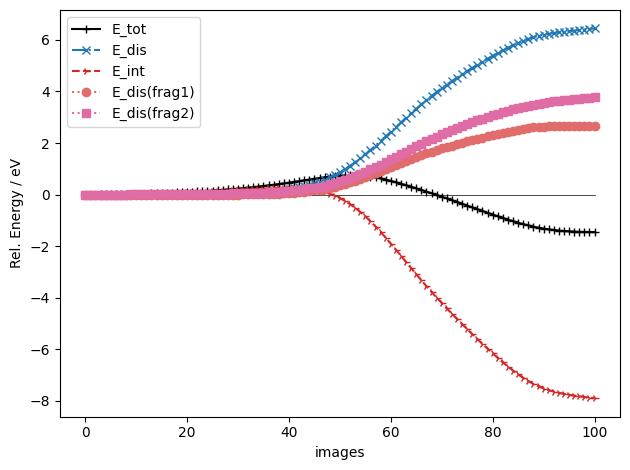

In [2]:
from gxtb import gxTB
from asedias.core import Fragment, aseDIAS
from ase.io import read
import numpy as np

images = read('DA.xyz', index=':')

def attach_calc(atoms, **kwargs):
    """Attach a calculator to the atoms."""
    calc = gxTB(**kwargs)
    atoms.calc = calc
    return atoms

# Define fragments as Fragment objects
frag1 = Fragment(index=np.array([7,8,11,12,14,20,21,22,23,24,25,26]) -1, charge=0, frag_name='frag1')
frag2 = Fragment(index=np.array([1,2,3,4,5,6,9,10,13,15,16,17,18,19]) - 1, charge=0, frag_name='frag2')

analysis = aseDIAS(images=images, fragments=[frag1, frag2, ], calc_attach=attach_calc, )
analysis.run()
plot = analysis.plot()

In [21]:
analysis.save('DA_analysis.json')